# Divide and Conquer and Computational Geometry 

The convex hull of a collection of points in two-dimensional space is the shape with the smallest area containing all points, such that the line segments connecting all pairs of points are entirely contained in the shape. <br> 
The convex hull is an important geometric concept that is useful in optimization and machine learning problems, but it isn’t obvious how to calculate it given a list of points. The goal of this task is to implement a brute force solution and a divide and conquer strategy described [here] for points in 2-D space. Then you will compare the speeds of both methods as a function of the number of points. In your experiments, calculate the speed of both methods for a fixed number of points many times, recording the average, best and worst- case times.

## Node and DLL classes
They are needed to store the values of the points, which include:
[x-coordinate, y-coordinate, 'Label'].
<br>
They also include merge sort, split and display functions that are needed for Divide and Conquer Method.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import timeit
import time

In [2]:
class Node:
    def __init__(self, data):
        self.data = data
        self.prev = None
        self.next = None

In [3]:
class DoublyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None

    def append(self, data):
        new_node = Node(data)
        if self.head is None:
            self.head = new_node
            self.tail = new_node
        else:
            current = self.head
            while current.next:
                current = current.next
            current.next = new_node
            new_node.prev = current
      
    def __str__(self) -> str:
        if self.head == None:
            return "Points: None" #empty node
        current = self.head
        result = "Points: "
        while current != None:
            result += "(" + str(current.data[0]) + ", " + str(current.data[1]) + "), "
            current = current.next
        return result[:-2]# [:-2] deletes the comma at the end
    #=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#
    def orientation(self, p, q, r):
        # 0: Collinear
        # 1: Clockwise
        # 2: Counterclockwise
        val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
        if val == 0:
            return 0
        elif val > 0:
            return 1
        else:
            return 2

    def counter(self):
        temp = self.head
        count = 0
        while temp:
            count += 1
            temp = temp.next
        return count
    #=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#
    def dete(self, a, b, c):
        return (a[0] * b[1] + b[0] * c[1] + c[0] * a[1]) - (a[1] * b[0] + b[1] * c[0] + c[1] * a[0])
    
    def bruteforce(self, points):
        points = sorted(points, key=lambda x: (x[0], x[1]))
        n = self.counter()
        convex_set = set()
        for i in range(n - 1):
            for j in range(i + 1, n):
                points_left_of_ij = points_right_of_ij = False
                ij_part_of_convex_hull = True
                for k in range(n):
                    if k not in {i, j}:
                        det_k = self.dete(points[i], points[j], points[k])

                        if det_k > 0:
                            points_left_of_ij = True
                        elif det_k < 0:
                            points_right_of_ij = True
                        # point[i], point[j], point[k] all lie on a straight line
                        # if point[k] is to the left of point[i] or it's to the
                        # right of point[j], then point[i], point[j] cannot be
                        # part of the convex hull of A
                        elif (points[k][0] < points[i][0] or points[k][0] > points[j][0]) or (points[k][1] < points[i][1] or points[k][1] > points[j][1]):
                            ij_part_of_convex_hull = False
                            break

                    if points_left_of_ij and points_right_of_ij:
                        ij_part_of_convex_hull = False
                        break

                if ij_part_of_convex_hull:
                    convex_set.update([tuple(points[i]), tuple(points[j])])

        return sorted(convex_set)
        
    #=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=#
    def divideconquer(self, points):
        n = self.counter()
        if n < 3:
            return "Convex hull not possible"
        hull = []
        l = 0
        for i in range(1, n):
            if points[i][0] < points[l][0]:
                l = i
        p = l
        while True:
            hull.append(points[p])
            q = (p + 1) % n
            for i in range(n):
                if self.orientation(points[p], points[i], points[q]) == 2:
                    q = i
            p = q
            if p == l:
                break
        return hull
    def extract(self):
        coordinates = []
        current = self.head
        while current:
            coordinates.append((current.data[0], current.data[1]))
            current = current.next
        return coordinates

## Plot Class
This class will be called to plot the graph by using matplotlib

In [4]:
class Plot:
    def __init__(self, dll):
        # Extract coordinates from the doubly linked list
        coordinates = np.array(dll.extract())
        # Unpack coordinates into x and y arrays
        x, y = coordinates[:, 0], coordinates[:, 1]
        # Get labels for points

        # Plot points
        plt.plot(x, y, 'ro')  # 'ro' means red circles
        for i, (xi, yi) in enumerate(zip(x, y)):
            plt.text(xi, yi, f'{chr(65+i)}', fontsize=13)
        # Plot lines between points
        hullpoints = np.array(dll.divideconquer(coordinates))
        hx, hy = hullpoints[:, 0], hullpoints[:, 1]
        plt.plot(hx, hy, 'b-')  # 'b-' means blue lines
        edgex, edgey = hullpoints[0][0], hullpoints[0][1]
        edgex = np.append(edgex, (hullpoints[-1][0]))
        edgey = np.append(edgey,( hullpoints[-1][1]))
        plt.plot(edgex, edgey, 'b-')  # 'b-' means blue lines

        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        # plt.title('Points')
        plt.grid(True)
        plt.show()

Points: (23, 29), (4, 40), (28, 28), (6, 16), (34, 13), (20, 10), (33, 14), (23, 1), (16, 37), (28, 19), (8, 40), (20, 28), (20, 28), (5, 6), (10, 30), (3, 17), (38, 3), (14, 27), (40, 2), (22, 12)


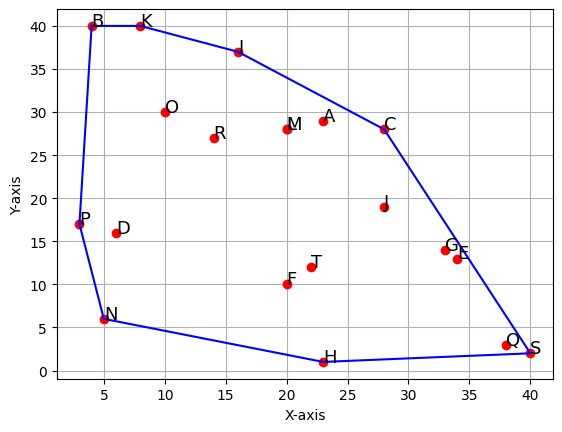

In [5]:
dll = DoublyLinkedList()
# np.random.seed(42)
[dll.append(np.random.randint(1, 41, size=2)) for _ in range(20)]
print(dll)
Plot(dll)

<h1><b>TIME TESTS</b></h1>

Brute Force worst-case scenario: 198.3492374420166, best-case scenario: 92.76747703552246, Average: 150.94878435134888
Divide and Conquer worst-case scenario: 0.0, best-case scenario: 0.0, Average: 0.0


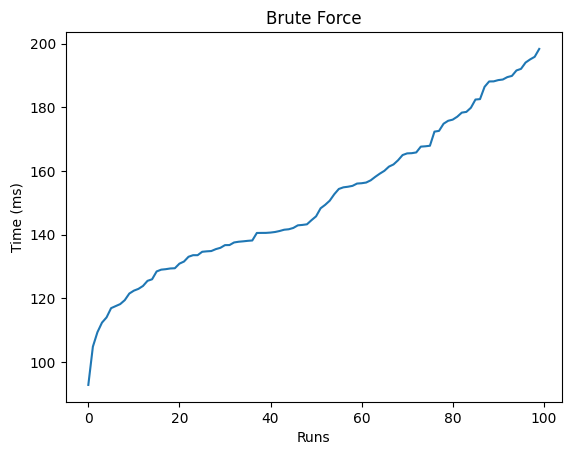

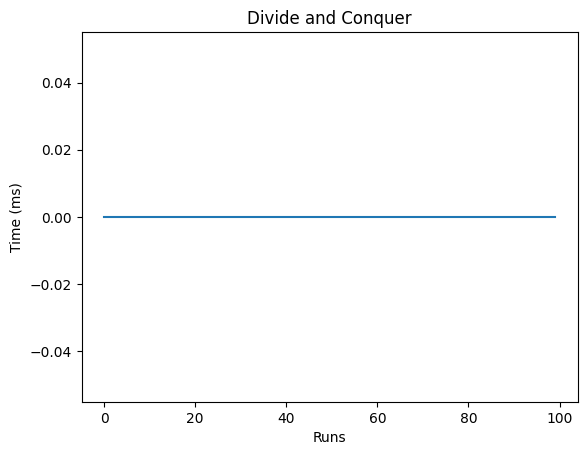

In [7]:
dll = DoublyLinkedList()
brute = []
conquer = []
for _ in range(100):
    nums = []
    [nums.append(np.random.randint(1, 41, size=2)) for _ in range(100000)]
    brute_start = time.time()
    bruteforce_res = dll.bruteforce(nums)
    brute_finish = time.time()
    brute.append((brute_finish - brute_start) * 1000)
    conquer_start = time.time()
    conquer_res = dll.divideconquer(nums)
    conquer_finish = time.time()
    conquer.append((conquer_finish - conquer_start) * 1000)
print(f"Brute Force worst-case scenario: {max(brute)}, best-case scenario: {min(brute)}, Average: {sum(brute)/100}")
print(f"Divide and Conquer worst-case scenario: {max(conquer)}, best-case scenario: {min(conquer)}, Average: {sum(conquer)/100}")

brute = sorted(brute)
conquer = sorted(conquer)

plt.plot(brute)
plt.xlabel('Runs')
plt.ylabel('Time (ms)')
plt.title('Brute Force')
plt.show()

plt.plot(conquer)
plt.xlabel('Runs')
plt.ylabel('Time (ms)')
plt.title('Divide and Conquer')
plt.show()

In [8]:
%%timeit
conquer_res = dll.divideconquer(nums)

171 ns ± 1.43 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [9]:
%%timeit
brute_res = dll.bruteforce(nums)

60.6 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
